In [78]:
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline
np.random.seed(1)

In [79]:
# The following code will load a "flower" 2-class dataset into variables X and Y.
#Your goal is to build a model to fit this data.
X, Y = load_planar_dataset()

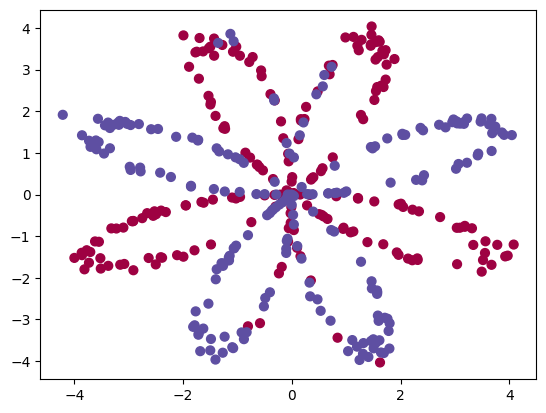

In [80]:
plt.scatter(X[0, :], X[1, :], c = Y, s = 40, cmap = plt.cm.Spectral);

In [81]:
# You have: - a numpy-array (matrix) X that contains your features (x1, x2) - a numpy-array (vector) Y that contains your labels (red:0, blue:1).

In [82]:
print(X.shape)
print(Y.shape)

(2, 400)
(1, 400)


In [83]:
shape_X = X.shape
shape_Y = Y.shape
m = Y.shape[1]
print("The shape of X is : " + str(shape_X))
print("The shape of Y is : " +str(shape_Y))
print("I have m = %d training examples!" % (m))

The shape of X is : (2, 400)
The shape of Y is : (1, 400)
I have m = 400 training examples!


In [84]:
#apply simple logistic regression
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

C:\Users\Ali Hamza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression: 47 :%(percentage of correctly labelled datapoints)


C:\Users\Ali Hamza\AppData\Local\Temp\ipykernel_12648\1354008839.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Accuracy of logistic regression: %d :" % float((np.dot(Y, LR_predictions) + np.dot(1 - Y, 1 - LR_predictions)) / float(Y.size) * 100)


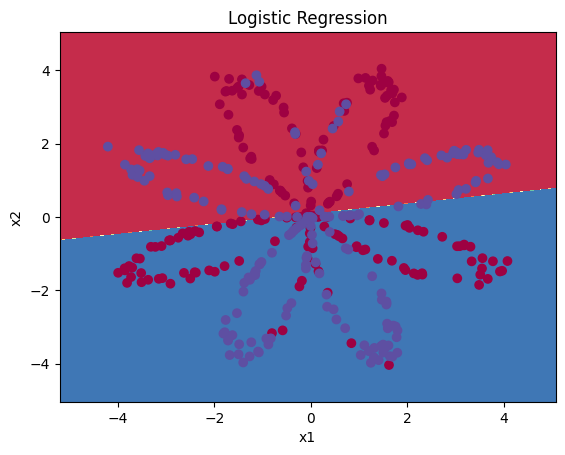

In [85]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

#print accuracy
LR_predictions = clf.predict(X.T)
print("Accuracy of logistic regression: %d :" % float((np.dot(Y, LR_predictions) + np.dot(1 - Y, 1 - LR_predictions)) / float(Y.size) * 100)
                                                      + "%" + "(percentage of correctly labelled datapoints)")

In [86]:
# Interpretation: The dataset is not linearly separable, so logistic regression doesn't perform well. 
# Hopefully a neural network will do better. Let's try this now!
# You are going to train a Neural Network with a single hidden layer.

In [87]:
# z^[1](i)  = W^[1] . x^(i) + b^[1](i)                                  --> eq (1)
# a^[1](i)  = tanh(z[1](i))                                             --> eq (2)
# z^[2](i)  = W[2] . a^[1](i) + b^[2](i)                                --> eq (3)
# y_hat^(i) = a^[2](i) = σ(z^[2](i))                                    --> eq (4)

# y_pred^(i) = { 1 if a^[2](i) > 0.5 
# 	       0 otherwise                                                  --> eq (5)

# Given the predictions on all the examples, you can also compute the cost J as follows:

# J = -1/m Σ (y^(i) log(a^[2](i)) + ( 1 - y^(i)) log(1-a^[2](i)))   --> eq (6)

In [88]:
# Define three variables: - n_x: the size of the input layer - n_h: the size of the hidden layer (set this to 4) - n_y: the size of the output layer
def layer_sizes(X,Y):
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer
   
    return (n_x, n_h, n_y)
    

In [89]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


In [90]:
#initialize parameters
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    ### END CODE HERE ###
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [91]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [92]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    ### START CODE HERE ### (≈ 4 lines of code)
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    ### END CODE HERE ###
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [93]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)
print(np.mean(cache['Z1']), np.mean(cache['A1']), np.mean(cache['Z2']), np.mean(cache['A2']))

-0.0004997557777419913 -0.000496963353231779 0.00043818745095914653 0.500109546852431


In [94]:
# J = -1/m Σ (y^(i) log(a^[2](i)) + ( 1 - y^(i)) log(1-a^[2](i)))   --> eq (6)

In [95]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[1]
    logprobs = np.multiply(np.log(A2),Y) + ((1-Y) * np.log(1 - A2) )
    cost = -(1/m) * np.sum(logprobs)
    cost = np.squeeze(cost)
    assert(isinstance(cost,float))
    return cost

In [96]:
A2, Y_assess, parameters = compute_cost_test_case()
print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6929198937761265


In [97]:
# dz^[2] = a^[2] - y                       # dZ^[2] = A^[2] - Y
# dW^[2] = dz^[2]a^[1]^T                   # dW^[2] = 1/m dZ^[2] A^[1]^T
                                           
# db^[2] = dz^[2]                          # db^[2] = 1/m np.sum(dZ^[2], axis = 1, keepdims = True)
# dz^[1] = W^[2]^T dz^[2] * g^[1]'(z^[1])  # dZ^[1] = W^[2]^T dZ^[2] * g^[1]'(Z^[1])
                                           
# dW^[1] = dz^[1] x^T                      # dW^[1] = 1/m dZ^[1] X^T
# db^[1] = dz^[1]                          # db^[1] = 1/m np.sum(dZ^[1], axis = 1, keepdims = True)


# To compute dZ1 you'll need to compute g[1]'(Z^[1]). Since g^[1](.) is the tanh activation function, 
# if a = g^[1](z) then g^[1]'(z) = 1 - a^2. So you can compute g^[1]' (Z^[1])
# using (1 - np.power(A1, 2)).

In [98]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]

    A1 = cache["A1"]
    A2 = cache["A2"]

    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1,2))                        # g^[1]'(Z^[1]) = 1 - a^2
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis = 1, keepdims = True)

    grads = {"dW1": dW1,
            "db1": db1,
            "dW2": dW2,
            "db2": db2}
    return grads

In [100]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()
grads = backward_propagation(parameters, cache, X_assess, Y_assess)

print("dW1 = " +str(grads["dW1"]))
print("db1 = " +str(grads["db1"])) 
print("dW2 = " +str(grads["dW2"])) 
print("db2 = " +str(grads["db2"])) 

dW1 = [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[0.06589489]]


In [103]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {"W1":W1,
                  "b1":b1,
                  "W2":W2,
                  "b2":b2}
    return parameters
    

In [105]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

In [107]:
print("W1 = " +str(parameters["W1"]))
print("b1 = " +str(parameters["b1"]))
print("W2 = " +str(parameters["W2"]))
print("b2 = " +str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


In [108]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost = False):
    np.random.seed(3)
    n_x = layer_sizes(X,Y)[0]
    n_y = layer_sizes(X,Y)[2]

    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)

    if print_cost and i % 1000 == 0:
        print("Cost after iteration %i: %f" %(i,cost))
    return parameters

In [109]:
X_assess, Y_assess = nn_model_test_case()

parameters = nn_model(X_assess, Y_assess, 4, num_iterations = 10000, print_cost = False)
print("W1 = " +str(parameters["W1"]))
print("b1 = " +str(parameters["b1"]))
print("W2 = " +str(parameters["W2"]))
print("b2 = " +str(parameters["b2"]))

C:\Users\Ali Hamza\AppData\Local\Temp\ipykernel_12648\754688466.py:3: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(np.log(A2),Y) + ((1-Y) * np.log(1 - A2) )
D:\UMT\FYP\2. NN Course Practice\planar_utils.py:34: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))


W1 = [[-4.1849804   5.33206036]
 [-7.53803952  1.2075572 ]
 [-4.19299257  5.32616886]
 [ 7.53798309 -1.20758946]]
b1 = [[ 2.32932936]
 [ 3.81001611]
 [ 2.33008878]
 [-3.81011427]]
W2 = [[-6033.82356528 -6008.14296151 -6033.0877968   6008.07952547]]
b2 = [[-52.67923353]]


In [110]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    return predictions

In [112]:
parameters, X_assess = predict_test_case()
predictions = predict(parameters, X_assess)
print("predictions mean = " +str(np.mean(predictions)))

predictions mean = 0.6666666666666666


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

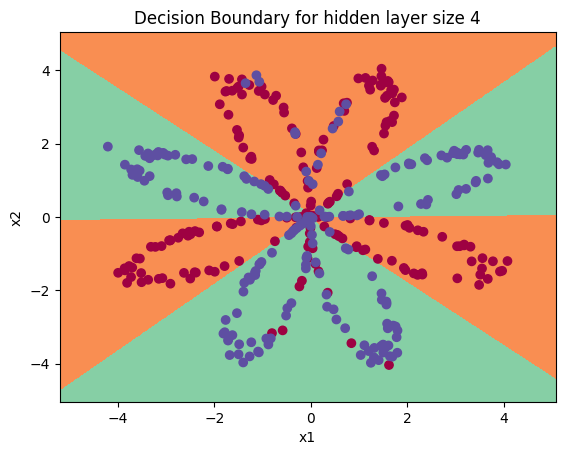

In [113]:
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost = True)
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [114]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


C:\Users\Ali Hamza\AppData\Local\Temp\ipykernel_12648\3101546138.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')


C:\Users\Ali Hamza\AppData\Local\Temp\ipykernel_12648\100116226.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 90.0 %
Accuracy for 50 hidden units: 90.75 %


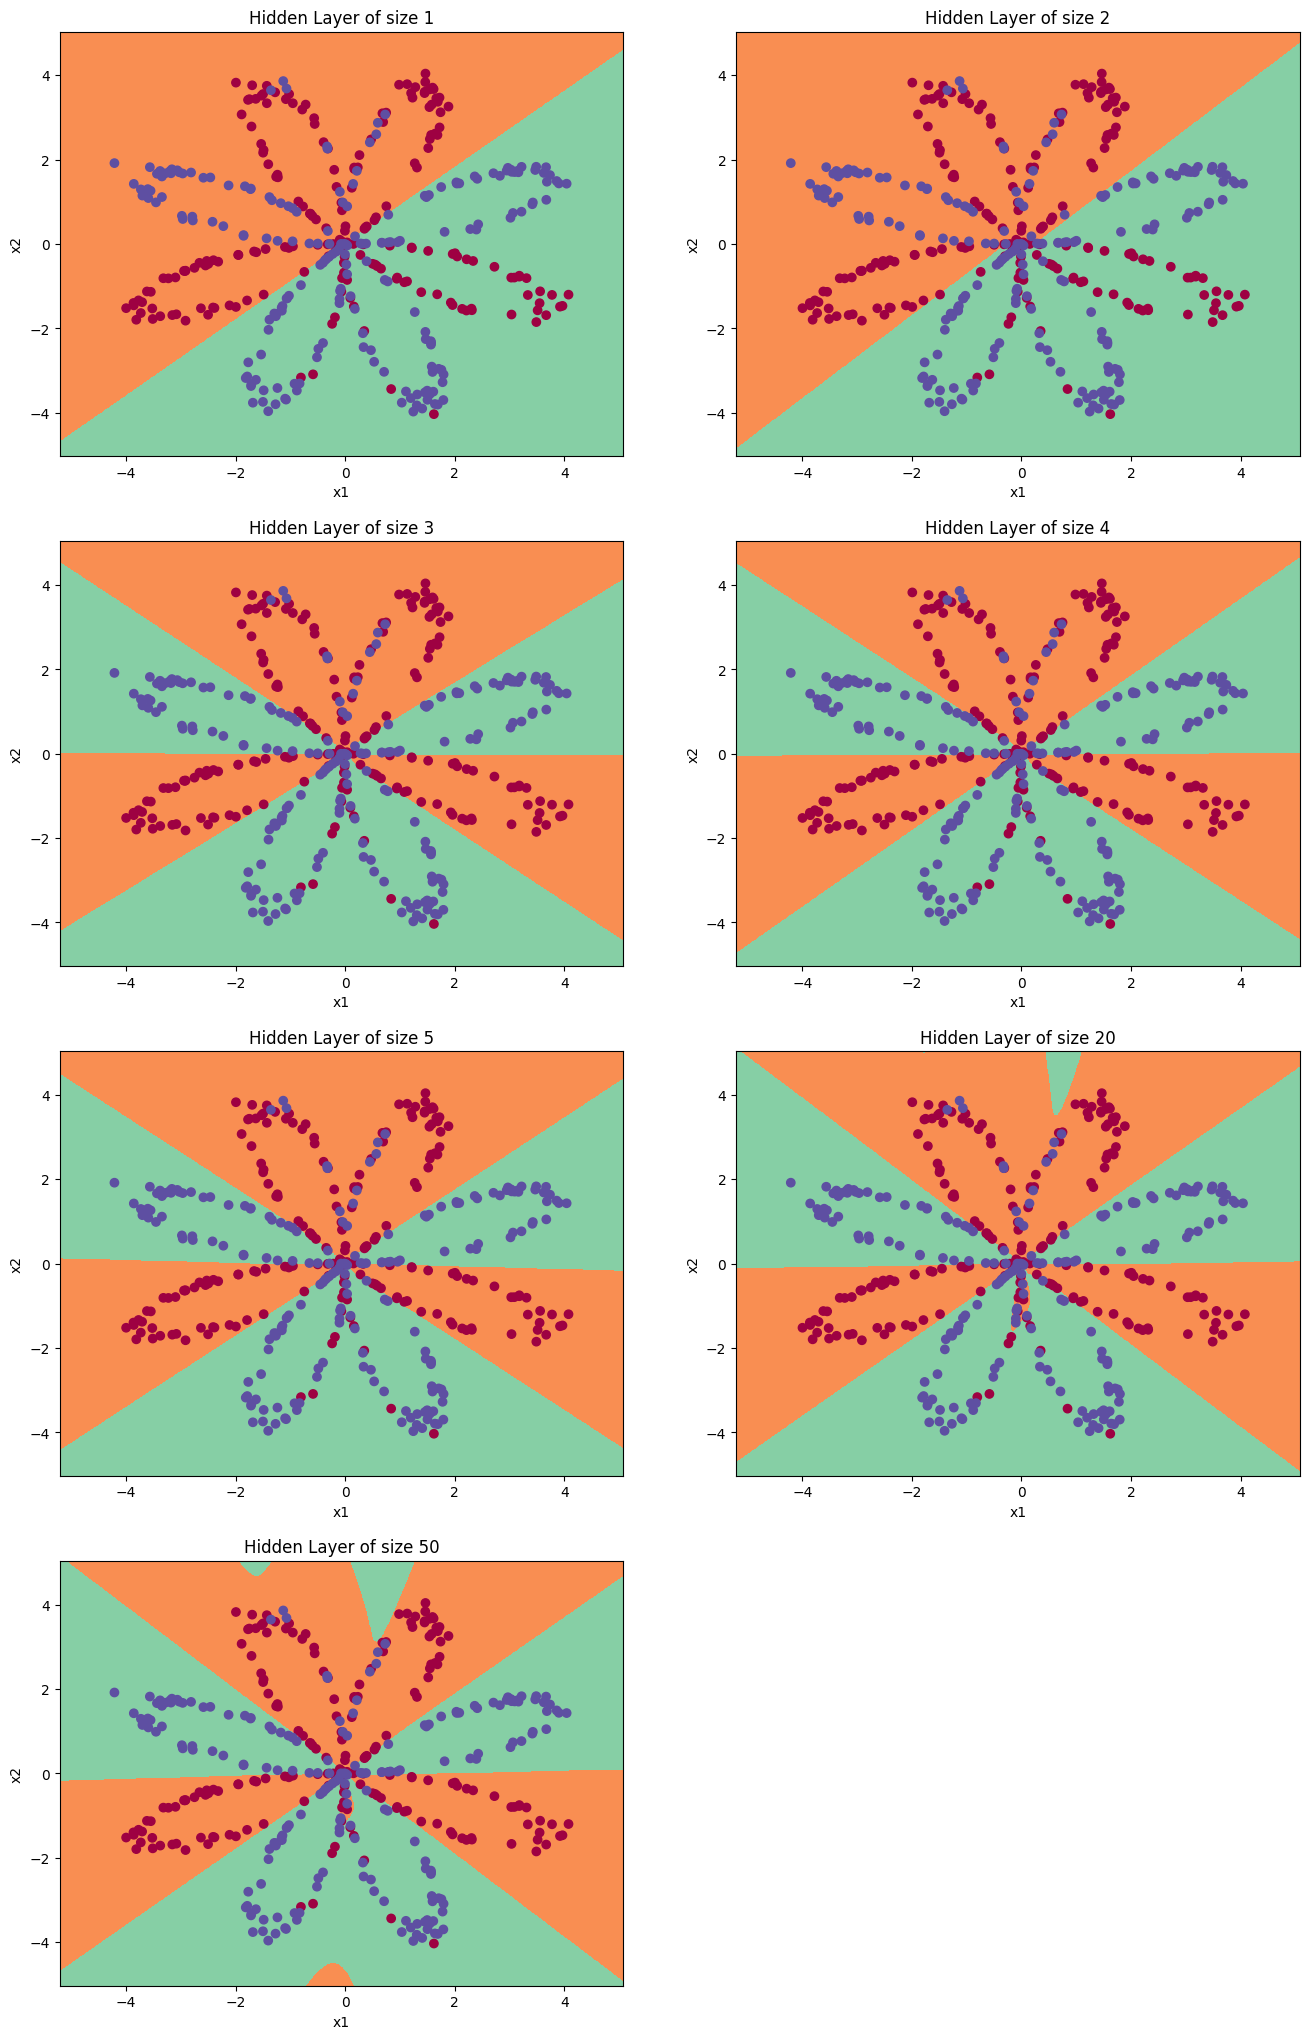

In [116]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

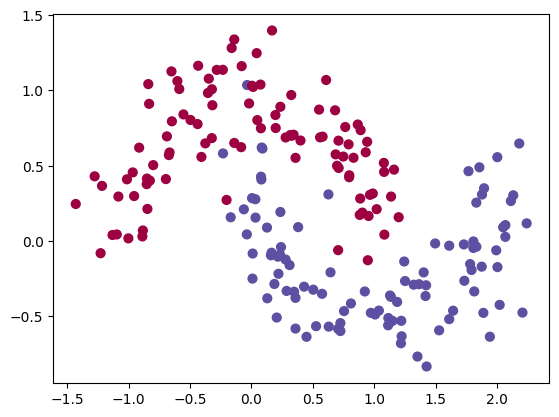

In [117]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_moons"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

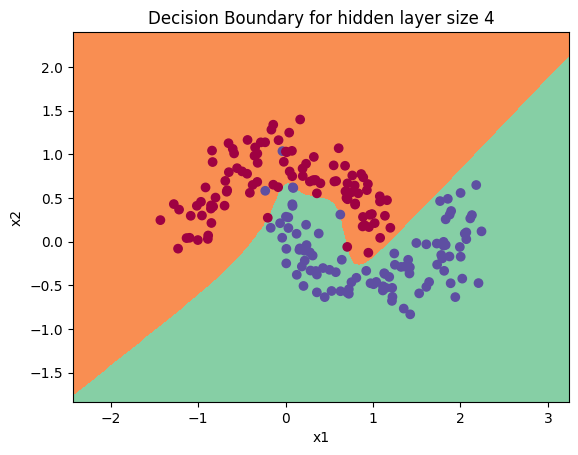

In [118]:
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost = True)
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [120]:
import pandas as pd
excel_file = pd.ExcelFile('D:/UMT/FYP/Phase 2/VowelsAndConsonantsFeatures.xlsx')
df = excel_file.parse('Sheet1')
df.columns = df.columns.str.strip()

In [121]:
v_f1 = np.array(df['v_Duration2'].values)
v_f2 = np.array(df['v_intensity_diff'].values)
c_f1 = np.array(df['c_Duration2'].values)
c_f2= np.array(df['c_intensity_diff'].values)

# Remove rows with NaN values
v_f1 = v_f1[~np.isnan(v_f1)]
v_f2 = v_f2[~np.isnan(v_f2)]

In [122]:
# Combine the normalized intensities with their respective durations
v_data = np.column_stack((v_f1, v_f2))
c_data = np.column_stack((c_f1, c_f2))

In [123]:
v_max_col1 = np.max(v_data[:, 0])
v_max_col2 = np.max(v_data[:, 1])
c_max_col1 = np.max(c_data[:,0])
c_max_col2 = np.max(c_data[:,1])

if v_max_col1 > 1.5:
    v_data[:, 0] = v_data[:, 0] / v_max_col1
    
if v_max_col2 > 1.5:
    v_data[:, 1] = v_data[:, 1] / v_max_col2
    
if c_max_col1 > 1.5:
    c_data[:, 0] = c_data[:, 0] / c_max_col1
    
if c_max_col2 > 1.5:
    c_data[:, 1] = c_data[:, 1] / c_max_col2

In [124]:
v_data_transpose = v_data.T
c_data_transpose = c_data.T

print(v_data_transpose.shape)
print(c_data_transpose.shape)

(2, 20)
(2, 24)


In [125]:
zeros = np.zeros(v_data.shape[0])
ones = np.ones(c_data.shape[0])
y = np.concatenate((zeros, ones))
Y_train = y.reshape((44,1)).T

In [126]:
# Stack vertically to create X_train
X_train = np.hstack((v_data_transpose, c_data_transpose))
print(X_train.shape)
print(Y_train.shape)

(2, 44)
(1, 44)


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

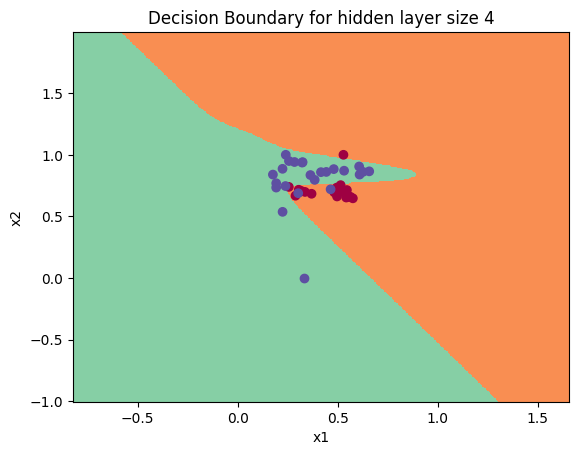

In [134]:
parameters = nn_model(X_train, Y_train, n_h = 4, num_iterations = 10000, print_cost = True)
plot_decision_boundary_my(lambda x: predict(parameters, x.T), X_train, Y_train)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [135]:

predictions = predict(parameters, X_train)
accuracy = float((np.dot(Y_train,predictions.T) + np.dot(1-Y_train,1-predictions.T))/float(Y_train.size)*100)
print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

Accuracy for 50 hidden units: 93.18181818181817 %


C:\Users\Ali Hamza\AppData\Local\Temp\ipykernel_12648\2924161315.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float((np.dot(Y_train,predictions.T) + np.dot(1-Y_train,1-predictions.T))/float(Y_train.size)*100)
